<a href="https://colab.research.google.com/github/EstherJi07/Aiffel_DS3_2/blob/main/1_BigQuery_%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

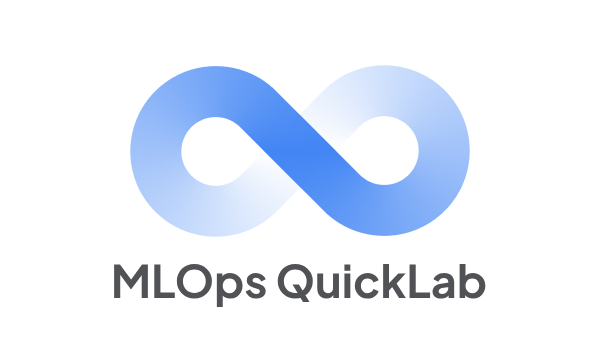

1. BigQuery 시작하기

In [ ]:
from google.cloud import bigquery

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
PROJECT_ID = "gde-project-aicloud"                  # @param { "type": "string" }

In [ ]:
client = bigquery.Client(PROJECT_ID)

In [ ]:
query = (
    f"""
    SELECT
        repository.language,
        AVG(repository.size) AS average_size,
        MAX(repository.pushed_at) AS latest_push_date,
        SUM(repository.forks) AS total_forks,
        COUNT(*) AS total_repositories,
        SUM(CASE WHEN repository.fork THEN 1 ELSE 0 END) AS total_forks_from_forks,
        ARRAY_AGG(DISTINCT repository.owner) AS unique_owners,
        MAX(repository.watchers) AS max_watchers,
        ARRAY_AGG(DISTINCT actor_attributes.location) AS unique_locations,
        STRING_AGG(DISTINCT payload.pull_request.base.repo.language, ', ') AS involved_languages,
        AVG(payload.pull_request.additions) AS average_additions_per_pull_request
    FROM
        `bigquery-public-data.samples.github_nested`
    WHERE
        repository.created_at >= '2010-01-01' AND
        repository.created_at <= '2012-12-31' AND
        repository.has_issues = TRUE AND
        repository.owner IS NOT NULL AND
        actor_attributes.location IS NOT NULL AND
        payload.pull_request.base.repo.language IS NOT NULL
    GROUP BY
        repository.language
    HAVING
        total_forks > 100 AND
        average_size > 500
    ORDER BY
        average_size DESC
    LIMIT 100;
    """
)
df = client.query(query).to_dataframe(create_bqstorage_client=False)
df.head()

,language,average_size,latest_push_date,total_forks,total_repositories,total_forks_from_forks,unique_owners,max_watchers,unique_locations,involved_languages,average_additions_per_pull_request
0,C++,47679.594393,2012/03/31 23:48:22 -0700,73395,1070,70,"[blackberry-gaming, CTSRD-CHERI, ispc, arthurw...",3367,"[Broughty Ferry, Scotland, Toronto, Canada, Mi...",C++,905.153271
1,C,14847.244835,2012/03/31 23:52:27 -0700,75699,968,38,"[pioneerspacesim, xbmc, moai, cocos2d, luvit, ...",1301,"[Prague, San Francisco, CA, Durban, Xiamen, Sa...","C++, C",863.227273
2,Racket,14125.333333,2012/03/29 10:16:41 -0700,222,6,0,"[shekari, plt]",216,"[Michigan, USA, Providence, RI, China, Suzhou,...",Racket,8.000000
3,C#,13814.031250,2012/03/31 22:53:12 -0700,37624,672,64,"[NServiceBus, kayak, projectkudu, Code52, nipp...",1387,"[Houston, TX, Sweden, Bellevue, WA, Ottawa, Ca...","JavaScript, C#",2016.818452
4,Java,13587.936411,2012/04/01 00:01:07 -0700,142507,2123,226,"[cucumber, cloudera, ocpsoft, objectos, JakeWh...",2896,"[Boston, MA, , Barcelona, San Francisco, CA, L...","Java, Scala",629.923222
